## Installing the necesssary libraries

In [74]:
!pip install numpy
!pip install pandas

## Importing Dependencies

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_curve, auc
import joblib
import streamlit as st
import warnings
warnings.filterwarnings("ignore")

## Loading Datasets

In [76]:
import pandas as pd

# Define the column names
columns = ['ID', 'Diagnosis'] + [ 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1',  'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2',  'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']
# Load the dataset with the updated column names
file_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
data = pd.read_csv(file_path, header=None, names=columns)

## Display first 5 rows

In [77]:
print(data.head())

         ID Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0    842302         M    17.99     10.38      122.80  1001.0      0.11840   
1    842517         M    20.57     17.77      132.90  1326.0      0.08474   
2  84300903         M    19.69     21.25      130.00  1203.0      0.10960   
3  84348301         M    11.42     20.38       77.58   386.1      0.14250   
4  84358402         M    20.29     14.34      135.10  1297.0      0.10030   

   compactness1  concavity1  concave_points1  ...  radius3  texture3  \
0       0.27760      0.3001          0.14710  ...    25.38     17.33   
1       0.07864      0.0869          0.07017  ...    24.99     23.41   
2       0.15990      0.1974          0.12790  ...    23.57     25.53   
3       0.28390      0.2414          0.10520  ...    14.91     26.50   
4       0.13280      0.1980          0.10430  ...    22.54     16.67   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      184.60  2019.0  

## Display last 10 Rows

In [78]:
print(data.tail(10))

         ID Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
559  925291         B    11.51     23.93       74.52   403.5      0.09261   
560  925292         B    14.05     27.15       91.38   600.4      0.09929   
561  925311         B    11.20     29.37       70.67   386.0      0.07449   
562  925622         M    15.22     30.62      103.40   716.9      0.10480   
563  926125         M    20.92     25.09      143.00  1347.0      0.10990   
564  926424         M    21.56     22.39      142.00  1479.0      0.11100   
565  926682         M    20.13     28.25      131.20  1261.0      0.09780   
566  926954         M    16.60     28.08      108.30   858.1      0.08455   
567  927241         M    20.60     29.33      140.10  1265.0      0.11780   
568   92751         B     7.76     24.54       47.92   181.0      0.05263   

     compactness1  concavity1  concave_points1  ...  radius3  texture3  \
559       0.10210     0.11120          0.04105  ...   12.480     37.16   
560 

## Displaying the shape

In [79]:
data.shape

(569, 32)

## Displaying information

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   Diagnosis           569 non-null    object 
 2   radius1             569 non-null    float64
 3   texture1            569 non-null    float64
 4   perimeter1          569 non-null    float64
 5   area1               569 non-null    float64
 6   smoothness1         569 non-null    float64
 7   compactness1        569 non-null    float64
 8   concavity1          569 non-null    float64
 9   concave_points1     569 non-null    float64
 10  symmetry1           569 non-null    float64
 11  fractal_dimension1  569 non-null    float64
 12  radius2             569 non-null    float64
 13  texture2            569 non-null    float64
 14  perimeter2          569 non-null    float64
 15  area2               569 non-null    float64
 16  smoothne

## Display statistical summary

In [81]:
data.describe()

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Display transposed statistical summary

In [82]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius1,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture1,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter1,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area1,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness1,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness1,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity1,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave_points1,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry1,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


## To Check for duplicate rows

In [83]:
num_total_rows = len(data) # Calculate total number of rows
num_duplicate_rows = data.duplicated().sum() # Calculate number of duplicate rows
percentage_duplicates = (num_duplicate_rows / num_total_rows) * 100 # Calculate percentage of duplicate rows
print(f"Number of Rows with Duplicates: {num_duplicate_rows}") # Print the results
print(f"Percentage of Duplicate Rows: {percentage_duplicates:.2f}%")

Number of Rows with Duplicates: 0
Percentage of Duplicate Rows: 0.00%


## Counting Unique Values for Each Column

In [84]:
# Count unique values for each column 
unique_counts = data.nunique()
# Display the unique counts 
print(unique_counts)

ID                    569
Diagnosis               2
radius1               456
texture1              479
perimeter1            522
area1                 539
smoothness1           474
compactness1          537
concavity1            537
concave_points1       542
symmetry1             432
fractal_dimension1    499
radius2               540
texture2              519
perimeter2            533
area2                 528
smoothness2           547
compactness2          541
concavity2            533
concave_points2       507
symmetry2             498
fractal_dimension2    545
radius3               457
texture3              511
perimeter3            514
area3                 544
smoothness3           411
compactness3          529
concavity3            539
concave_points3       492
symmetry3             500
fractal_dimension3    535
dtype: int64


## Dropping unecessary columns (ID)

In [85]:
if 'ID' in data.columns:
    data.drop('ID', axis=1, inplace=True)
print(data.columns)

Index(['Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1',
       'smoothness1', 'compactness1', 'concavity1', 'concave_points1',
       'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2',
       'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')


## Encoding Target variables

In [86]:
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})  # Map 'M' to 1, 'B' to 0
print(data.head()) 

   Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0          1    17.99     10.38      122.80  1001.0      0.11840   
1          1    20.57     17.77      132.90  1326.0      0.08474   
2          1    19.69     21.25      130.00  1203.0      0.10960   
3          1    11.42     20.38       77.58   386.1      0.14250   
4          1    20.29     14.34      135.10  1297.0      0.10030   

   compactness1  concavity1  concave_points1  symmetry1  ...  radius3  \
0       0.27760      0.3001          0.14710     0.2419  ...    25.38   
1       0.07864      0.0869          0.07017     0.1812  ...    24.99   
2       0.15990      0.1974          0.12790     0.2069  ...    23.57   
3       0.28390      0.2414          0.10520     0.2597  ...    14.91   
4       0.13280      0.1980          0.10430     0.1809  ...    22.54   

   texture3  perimeter3   area3  smoothness3  compactness3  concavity3  \
0     17.33      184.60  2019.0       0.1622        0.6656      0.7119   
1   

## Diagnosis column of the data

In [87]:
print(data['Diagnosis'].value_counts())

Diagnosis
0    357
1    212
Name: count, dtype: int64


## Visualisation of Target labels

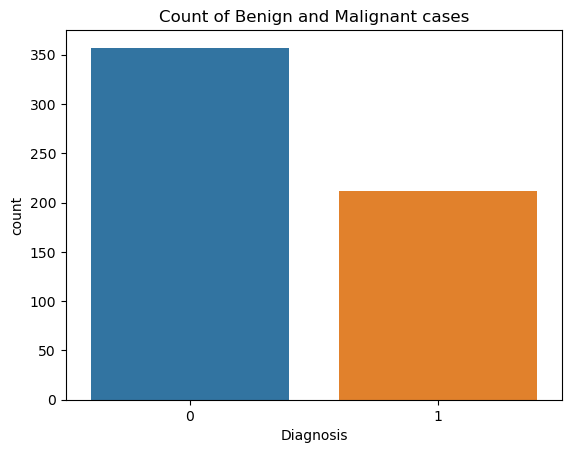

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot of the target variable (Benign vs Malignant)
sns.countplot(x='Diagnosis', data=data)
plt.title('Count of Benign and Malignant cases')
plt.show()

## Correlation matrix of features

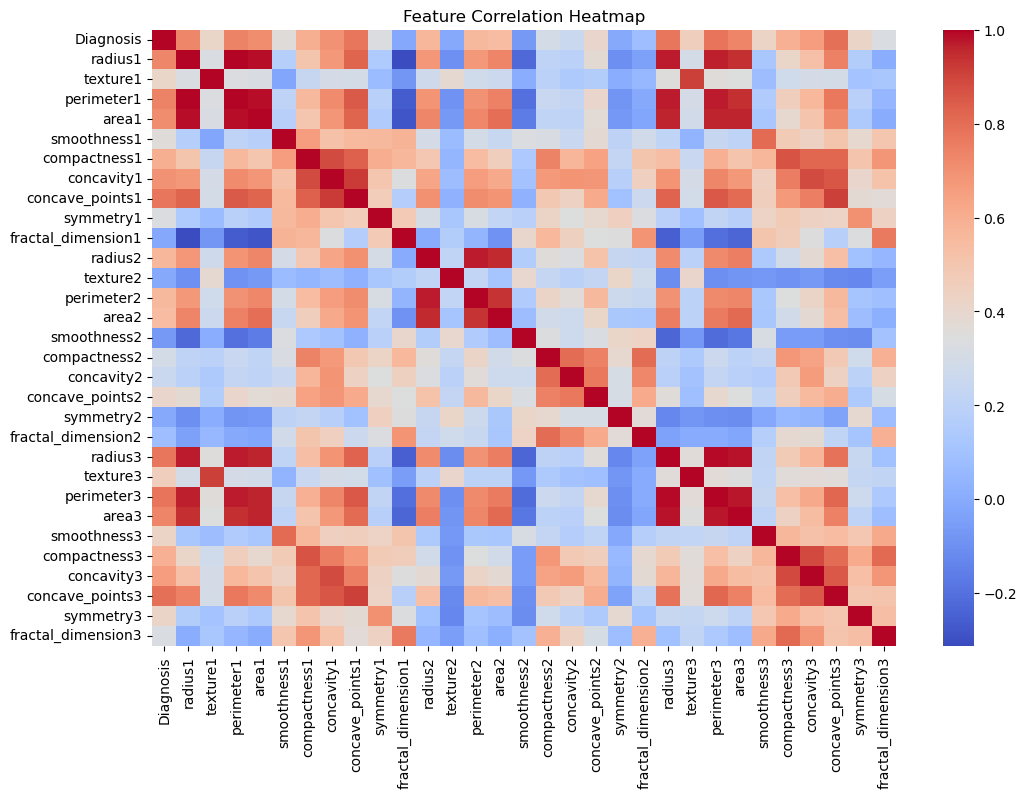

In [89]:
# Correlation heatmap to visualize relationships between features
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## Train, Test Splitting

In [90]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data.drop('Diagnosis', axis=1)  # All columns except Diagnosis
y = data['Diagnosis']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Training data shape: {X_train.shape}')
print(f'Testing data shape: {X_test.shape}')

Training data shape: (398, 30)
Testing data shape: (171, 30)


## Scaling the features

In [91]:
from sklearn.preprocessing import StandardScaler
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

## Identify and Handle Outliers

In [92]:
import numpy as np
from scipy import stats

# Calculate Z-scores to identify outliers (for example, using a threshold of 3)
z_scores = np.abs(stats.zscore(X))
X_with_outliers = X[(z_scores < 3).all(axis=1)]
y_with_outliers = y[(z_scores < 3).all(axis=1)]

## Split the Data into Training and Testing Sets

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_with_outliers, y_with_outliers, test_size=0.3, random_state=42)

## Apply SMOTE to Balance the Training Set

In [94]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE for balancing
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

## Train the AdaBoost Model

In [95]:
# Initialize the AdaBoost classifier with a Decision Tree as the base estimator
estimator = DecisionTreeClassifier(max_depth=1)  # Weak learner
ada_model = AdaBoostClassifier(estimator=estimator, n_estimators=50, learning_rate=1.0, random_state=42)

# Train the AdaBoost model on the balanced training set
ada_model.fit(X_train_balanced, y_train_balanced)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

## Evaluate the Model

In [96]:
from sklearn.ensemble import RandomForestClassifier  # Example model
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Step 1: Initialize the model
model = RandomForestClassifier(random_state=42)

# Step 2: Train the model on the resampled data
model.fit(X_train_balanced, y_train_balanced)

# Step 3: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 4: Compute performance metrics
accuracy_smote = accuracy_score(y_test, y_pred)
precision_smote = precision_score(y_test, y_pred, average='binary')  # Use 'binary' or 'weighted' for multiclass
recall_smote = recall_score(y_test, y_pred, average='binary')

# Step 5: Display the evaluation results
print("\nPerformance Metrics (Before Hyperparameter Tuning):")
print(f"Accuracy: {accuracy_smote:.4f}")
print(f"Precision: {precision_smote:.4f}")
print(f"Recall: {recall_smote:.4f}")



Performance Metrics (Before Hyperparameter Tuning):
Accuracy: 0.9732
Precision: 0.9483
Recall: 0.9821


## Confusion Matrix

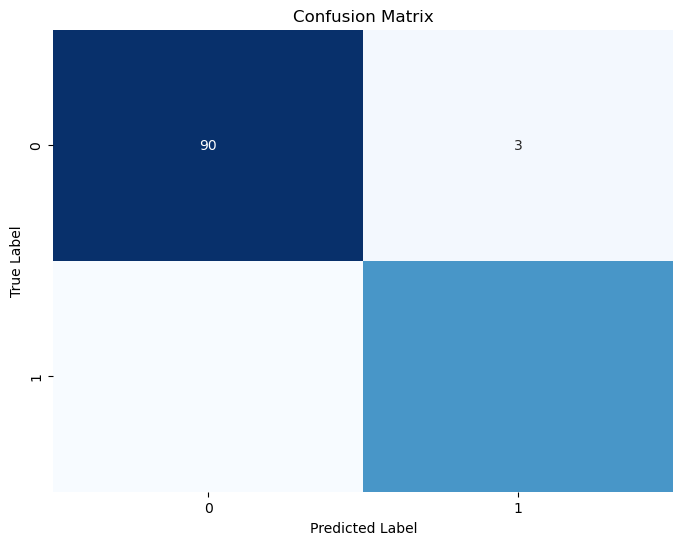

In [97]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn with the 'Blues' colormap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Hyperparameter Tuning

In [105]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Initialize the AdaBoost model
base_model = AdaBoostClassifier(random_state=42)

# Step 3: Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of weak learners
    'learning_rate': [0.01, 0.1, 1, 10],  # Step size shrinkage
}

# Step 4: Perform Grid Search
grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 5: Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Display results
print("Best Parameters:", grid_search.best_params_)
print("Training Accuracy:", grid_search.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Training Accuracy: 0.8057142857142857
Test Accuracy: 0.83

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.83       160
           1       0.79      0.86      0.82       140

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



## Confusion Matrix for best model

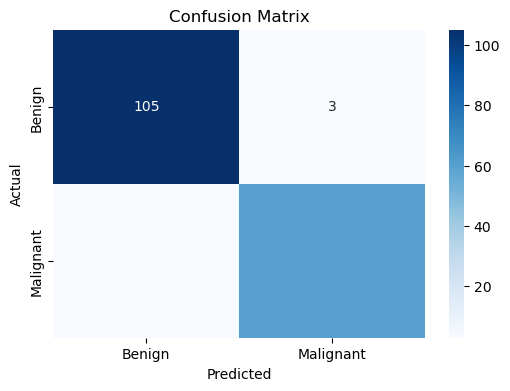

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Visualize the confusion matrix using seaborn's heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])

# Labeling the axes
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Display the plot
plt.show()


## Classification Report

In [107]:
from sklearn.metrics import classification_report

# Assuming `grid_search.best_estimator_` has the best model after tuning
best_model = grid_search.best_estimator_

# Generate predictions on the test set
y_pred = best_model.predict(X_test)

# Generate and print the classification report
report = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])
print("Classification Report (After Hyperparameter Tuning):")
print(report)


Classification Report (After Hyperparameter Tuning):
              precision    recall  f1-score   support

      Benign       0.87      0.81      0.83       160
   Malignant       0.79      0.86      0.82       140

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



## Visualize Feature Importance

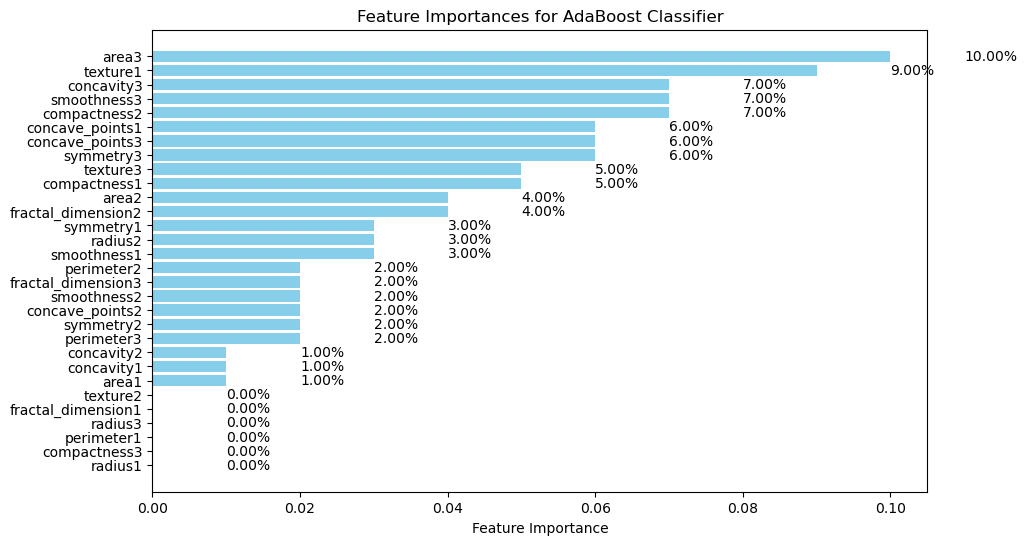

In [70]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset with the updated column names
columns = ['ID', 'Diagnosis'] + [ 
    'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1',
    'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2',
    'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3',
    'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3'
]
file_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
data = pd.read_csv(file_path, header=None, names=columns)

# Convert diagnosis to a binary value (Benign = 0, Malignant = 1)
data['Diagnosis'] = data['Diagnosis'].map({'B': 0, 'M': 1})

# Drop the 'ID' column as it is not a feature for prediction
X = data.drop(columns=['ID', 'Diagnosis'])
y = data['Diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::1]

# Get the feature names based on sorted indices
sorted_feature_names = np.array(X.columns)[sorted_idx]

# Plot the feature importances in descending order
plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_feature_names, feature_importances[sorted_idx], color='skyblue')

# Add annotations (percentage of importance)
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width*100:.2f}%', va='center')

# Set labels and title
plt.xlabel('Feature Importance')
plt.title('Feature Importances for AdaBoost Classifier')

# Display the plot
plt.show()


## ROC Curve and AUC

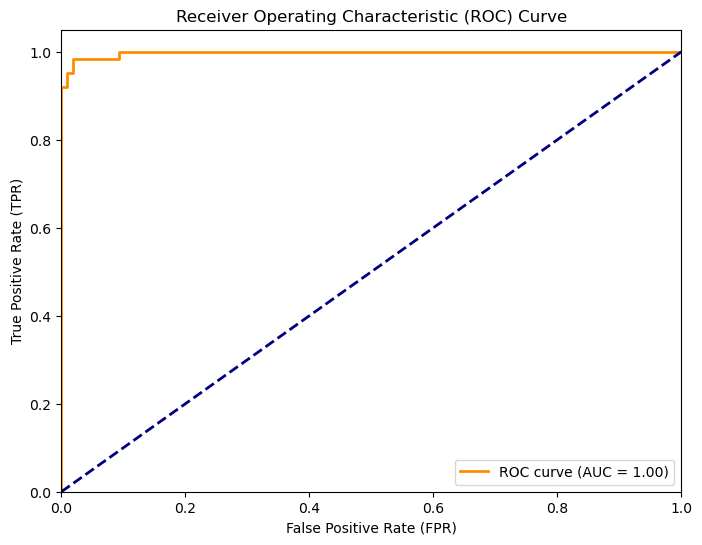

In [72]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the test set
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class (Malignant)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Saving the model

In [73]:
import joblib

# Save the model to a file
model_filename = 'adaboost_model.pkl'
joblib.dump(model, model_filename)

print(f"Model saved to {model_filename}")

Model saved to adaboost_model.pkl
